In [1]:
import sys

%load_ext autoreload

%autoreload 2

import river.cluster as rcluster
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from clustpy.partition import XMeans
from sklearn.cluster import KMeans, HDBSCAN
from dbhd_clustering.DBHDALGO import DBHD
from clustpy.metrics import unsupervised_clustering_accuracy, PairCountingScores
from river import metrics as rmetrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from evaluate import printMetrics 
from datahandler import load_data

from scipy.spatial import Voronoi, voronoi_plot_2d

(3031, 2)
3031


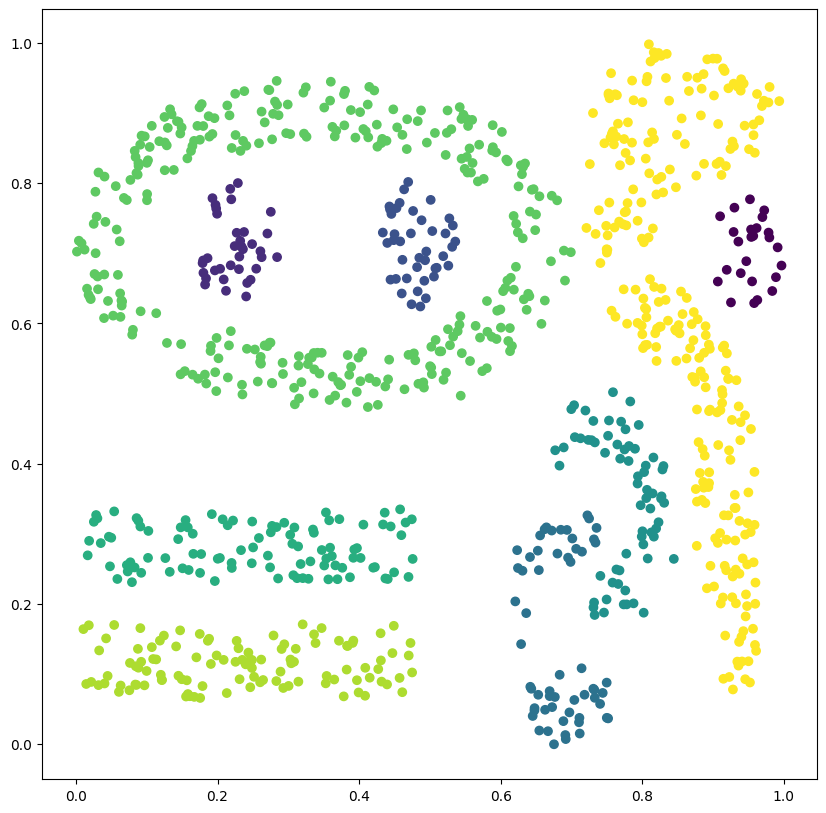

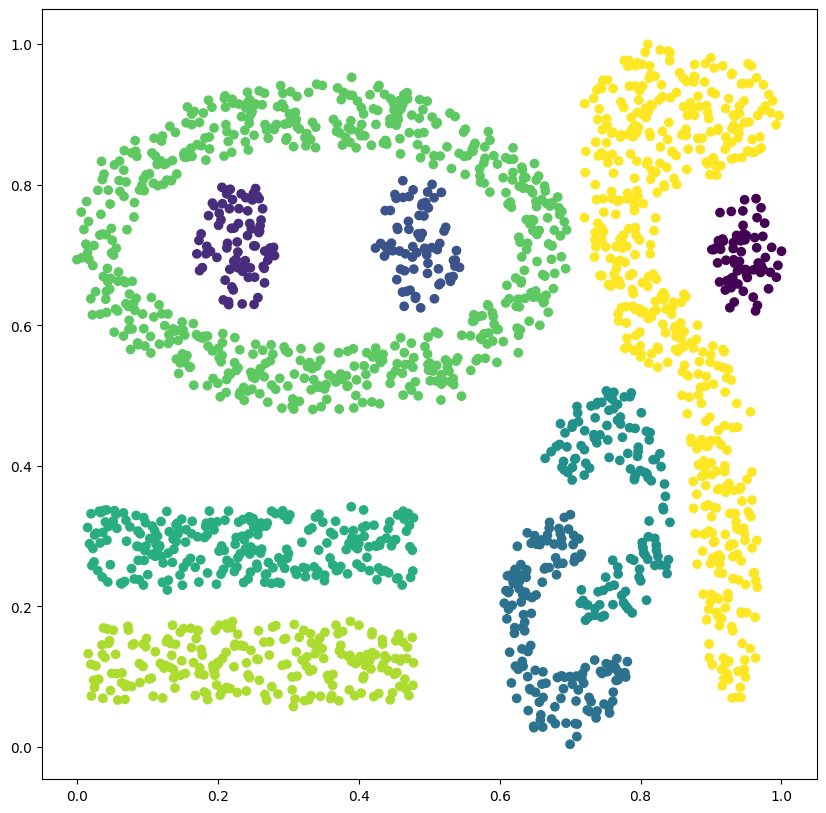

In [99]:
X, y = load_data("complex9", "artificial", 2)
print(X.shape)
print(len(y))
c = 1000
X_test = X[c:]
y_test = y[c:]
X = X[:c]
y = y[:c]
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

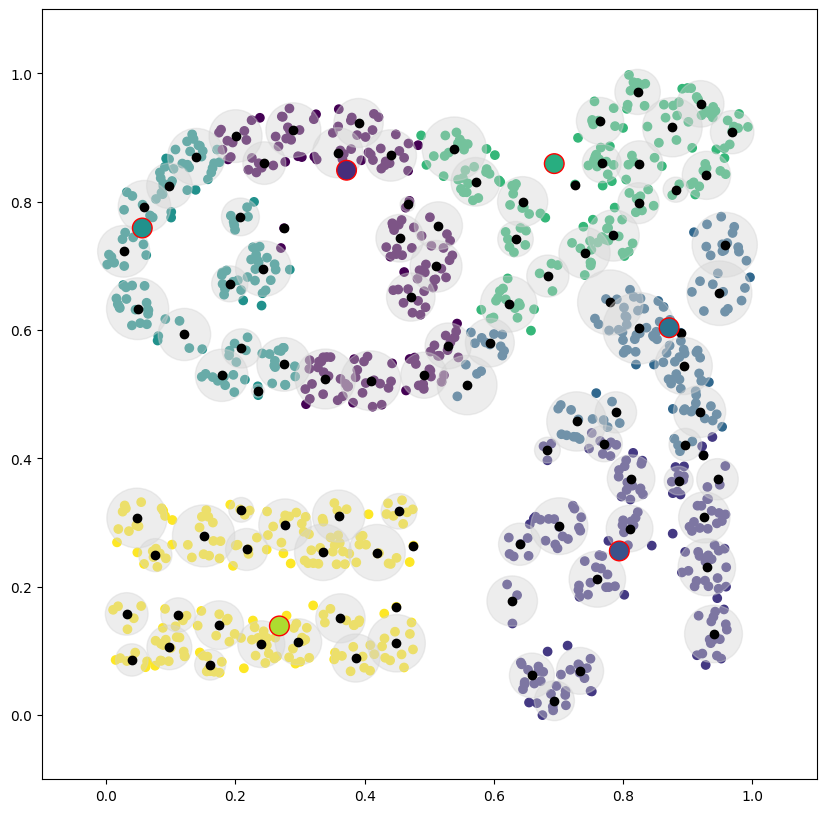

    0   1     2    3    4     5     6   7     8  
0   0     0    0   25     0     0   0     0   0  
1   0     2    0    0    34     0   0     0   0  
2   0    41    0    0     0     0   0     0   0  
3   0     0   59    0     0     0   0     0   0  
4   0     0   51   15     0     0   0     0   0  
5   0     0    0    0     0     0   0   100   0  
6   0   122    0   14   105    66   0     0   0  
7   0     0    0    0     0     0   0   108   0  
8   0     0   67   77     0   114   0     0   0  
Acc: 0.462 NMI: 0.5970311699077122 ARI: 0.34699267438474357 AMI: 0.5924438295153043 Pur.: 0.593 Prec.: 0.49682969946965233 Rec.: 0.4370399552136681 F1: 0.4650208485008935 Comp.: 0.612517502900259 Fowl.: 0.46597685522463134 Homo.: 0.5823086109428035 Clu.Num.: 6 True Clu.Num 9


In [139]:
from utils import dict_to_np, dps_to_np
from competitors.clustream import CluStream
clustream = CluStream(n_macro_clusters=9, max_micro_clusters=100, sigma=0.5, mu=0.5, seed=0, time_gap=10000)
for x in X:
	dp = dict(enumerate(x))
	clustream.learn_one(dp)
clustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = clustream.predict_one(dp, recluster=True)
	clustream_labels_train.append(pred)

#vor = Voronoi(dps_to_np(clustream.centers.values()))
clustream_centers = dps_to_np(clustream.centers.values())
plt.figure(figsize=(10, 10))
#voronoi_plot_2d(vor, show_vertices=False, show_points=False)
plt.scatter(X[:, 0], X[:, 1], c=clustream_labels_train)
for id, mc in clustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=clustream.centers.keys(), s= 200, edgecolors='red')
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
       
print(printMetrics(y, clustream_labels_train))

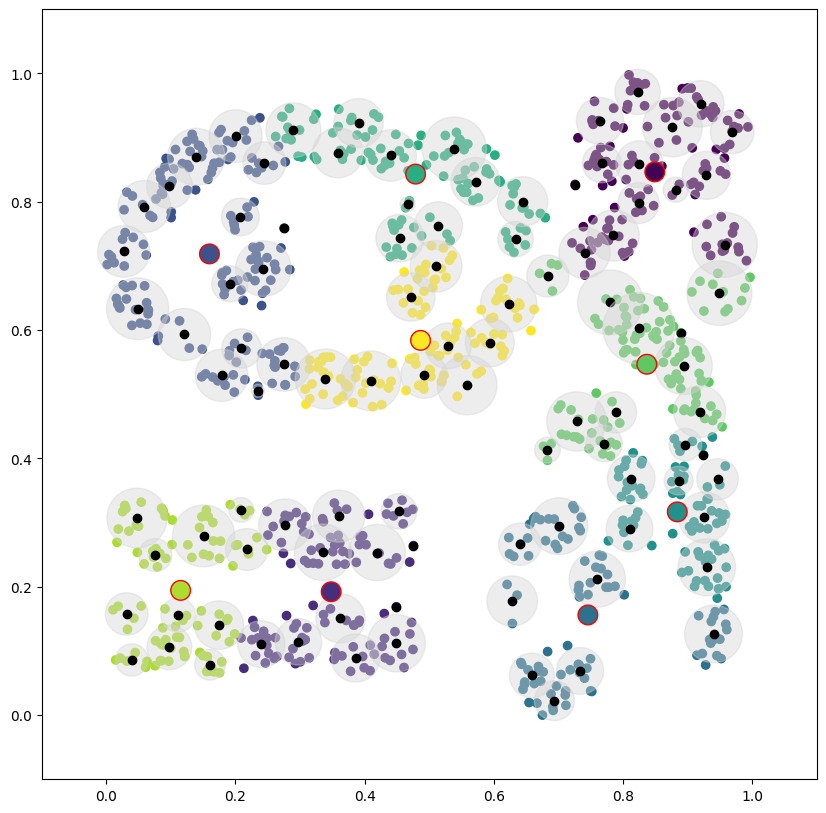

    0     1    2     3    4    5    6    7    8   
0    14    0     0    0    0    0   11    0    0  
1     0    0    36    0    0    0    0    0    0  
2     0    0     0    0    0   18    0    0   23  
3     0    0     0   59    0    0    0    0    0  
4     0    0     0   15   25    0   26    0    0  
5     0   54     0    0    0    0    0   46    0  
6     0    0   124    0    0   91    4    0   88  
7     0   60     0    0    0    0    0   48    0  
8   114    0     0   16   55    0   73    0    0  
Acc: 0.465 NMI: 0.6191406040517221 ARI: 0.36715672415063677 AMI: 0.6127440897855855 Pur.: 0.712 Prec.: 0.6150514347590688 Rec.: 0.36509154243297604 F1: 0.45819861431870673 Comp.: 0.5756276929921633 Fowl.: 0.47386715120569745 Homo.: 0.6697699249279763 Clu.Num.: 9 True Clu.Num 9


In [101]:
from competitors.clustream import CluStream
clustream2 = CluStream(n_macro_clusters=9, max_micro_clusters=100, sigma=0.5, mu=0.5, seed=0, time_gap=10000)
for x in X:
	dp = dict(enumerate(x))
	clustream2.learn_one(dp)
clustream2_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = clustream2.predict_one(dp, recluster=True, sklearn=True)
	clustream2_labels_train.append(pred)
    
clustream_centers = clustream2._kmeans.cluster_centers_
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=clustream2_labels_train)
for id, mc in clustream2.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
       
print(printMetrics(y, clustream2_labels_train))

49 Singleton parent: 49 50 [{0: 0.5054088966617611, 1: 0.5138995594713656}, r=0.01489439279622649, weight=2.0, time=Mean: 74.]
75 New DP: 75, [{0: 0.6033972235903395, 1: 0.6458032305433187}, r=0, weight=1.0, time=Mean: 75.]
50 MC insert: 50 -> 49 [{0: 0.5100151099130664, 1: 0.5157521292217326}, r=0.01489439279622649, weight=3.0, time=Mean: 74.]
76 New DP: 77, [{0: 0.879544402204848, 1: 0.4306161527165932}, r=0, weight=1.0, time=Mean: 76.]
51 New MC 51: [{0: 0.031163089736367895, 1: 0.6485027900146842}, r=0.001, weight=1.0, time=Mean: 74.]
79 New MC merge: 8 + 18 -> 79 [{0: 0.891408436581129, 1: 0.5608}, r=0.005946470853490622, weight=2.0, time=Mean: 74.]
77 New DP: 80, [{0: 0.0303137101079125, 1: 0.322079295154185}, r=0, weight=1.0, time=Mean: 77.]
52 New MC 52: [{0: 0.41435569541482464, 1: 0.9369773861967694}, r=0.001, weight=1.0, time=Mean: 74.]
82 New MC merge: 13 + 52 -> 82 [{0: 0.41787708179112926, 1: 0.9343870778267254}, r=0.005371482524629868, weight=2.0, time=Mean: 74.]
78 New 

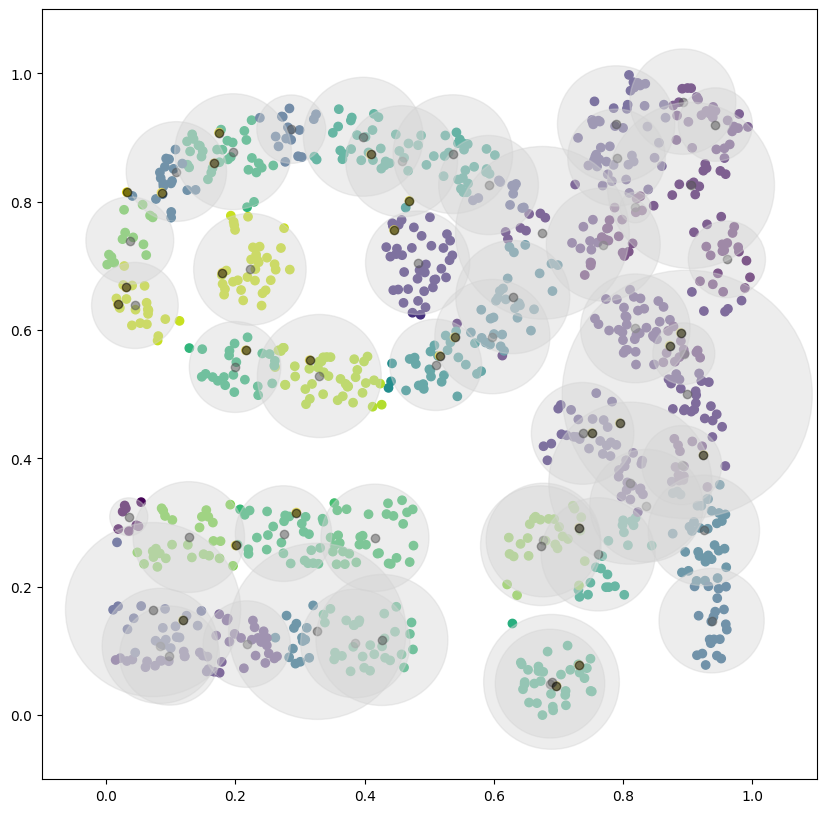

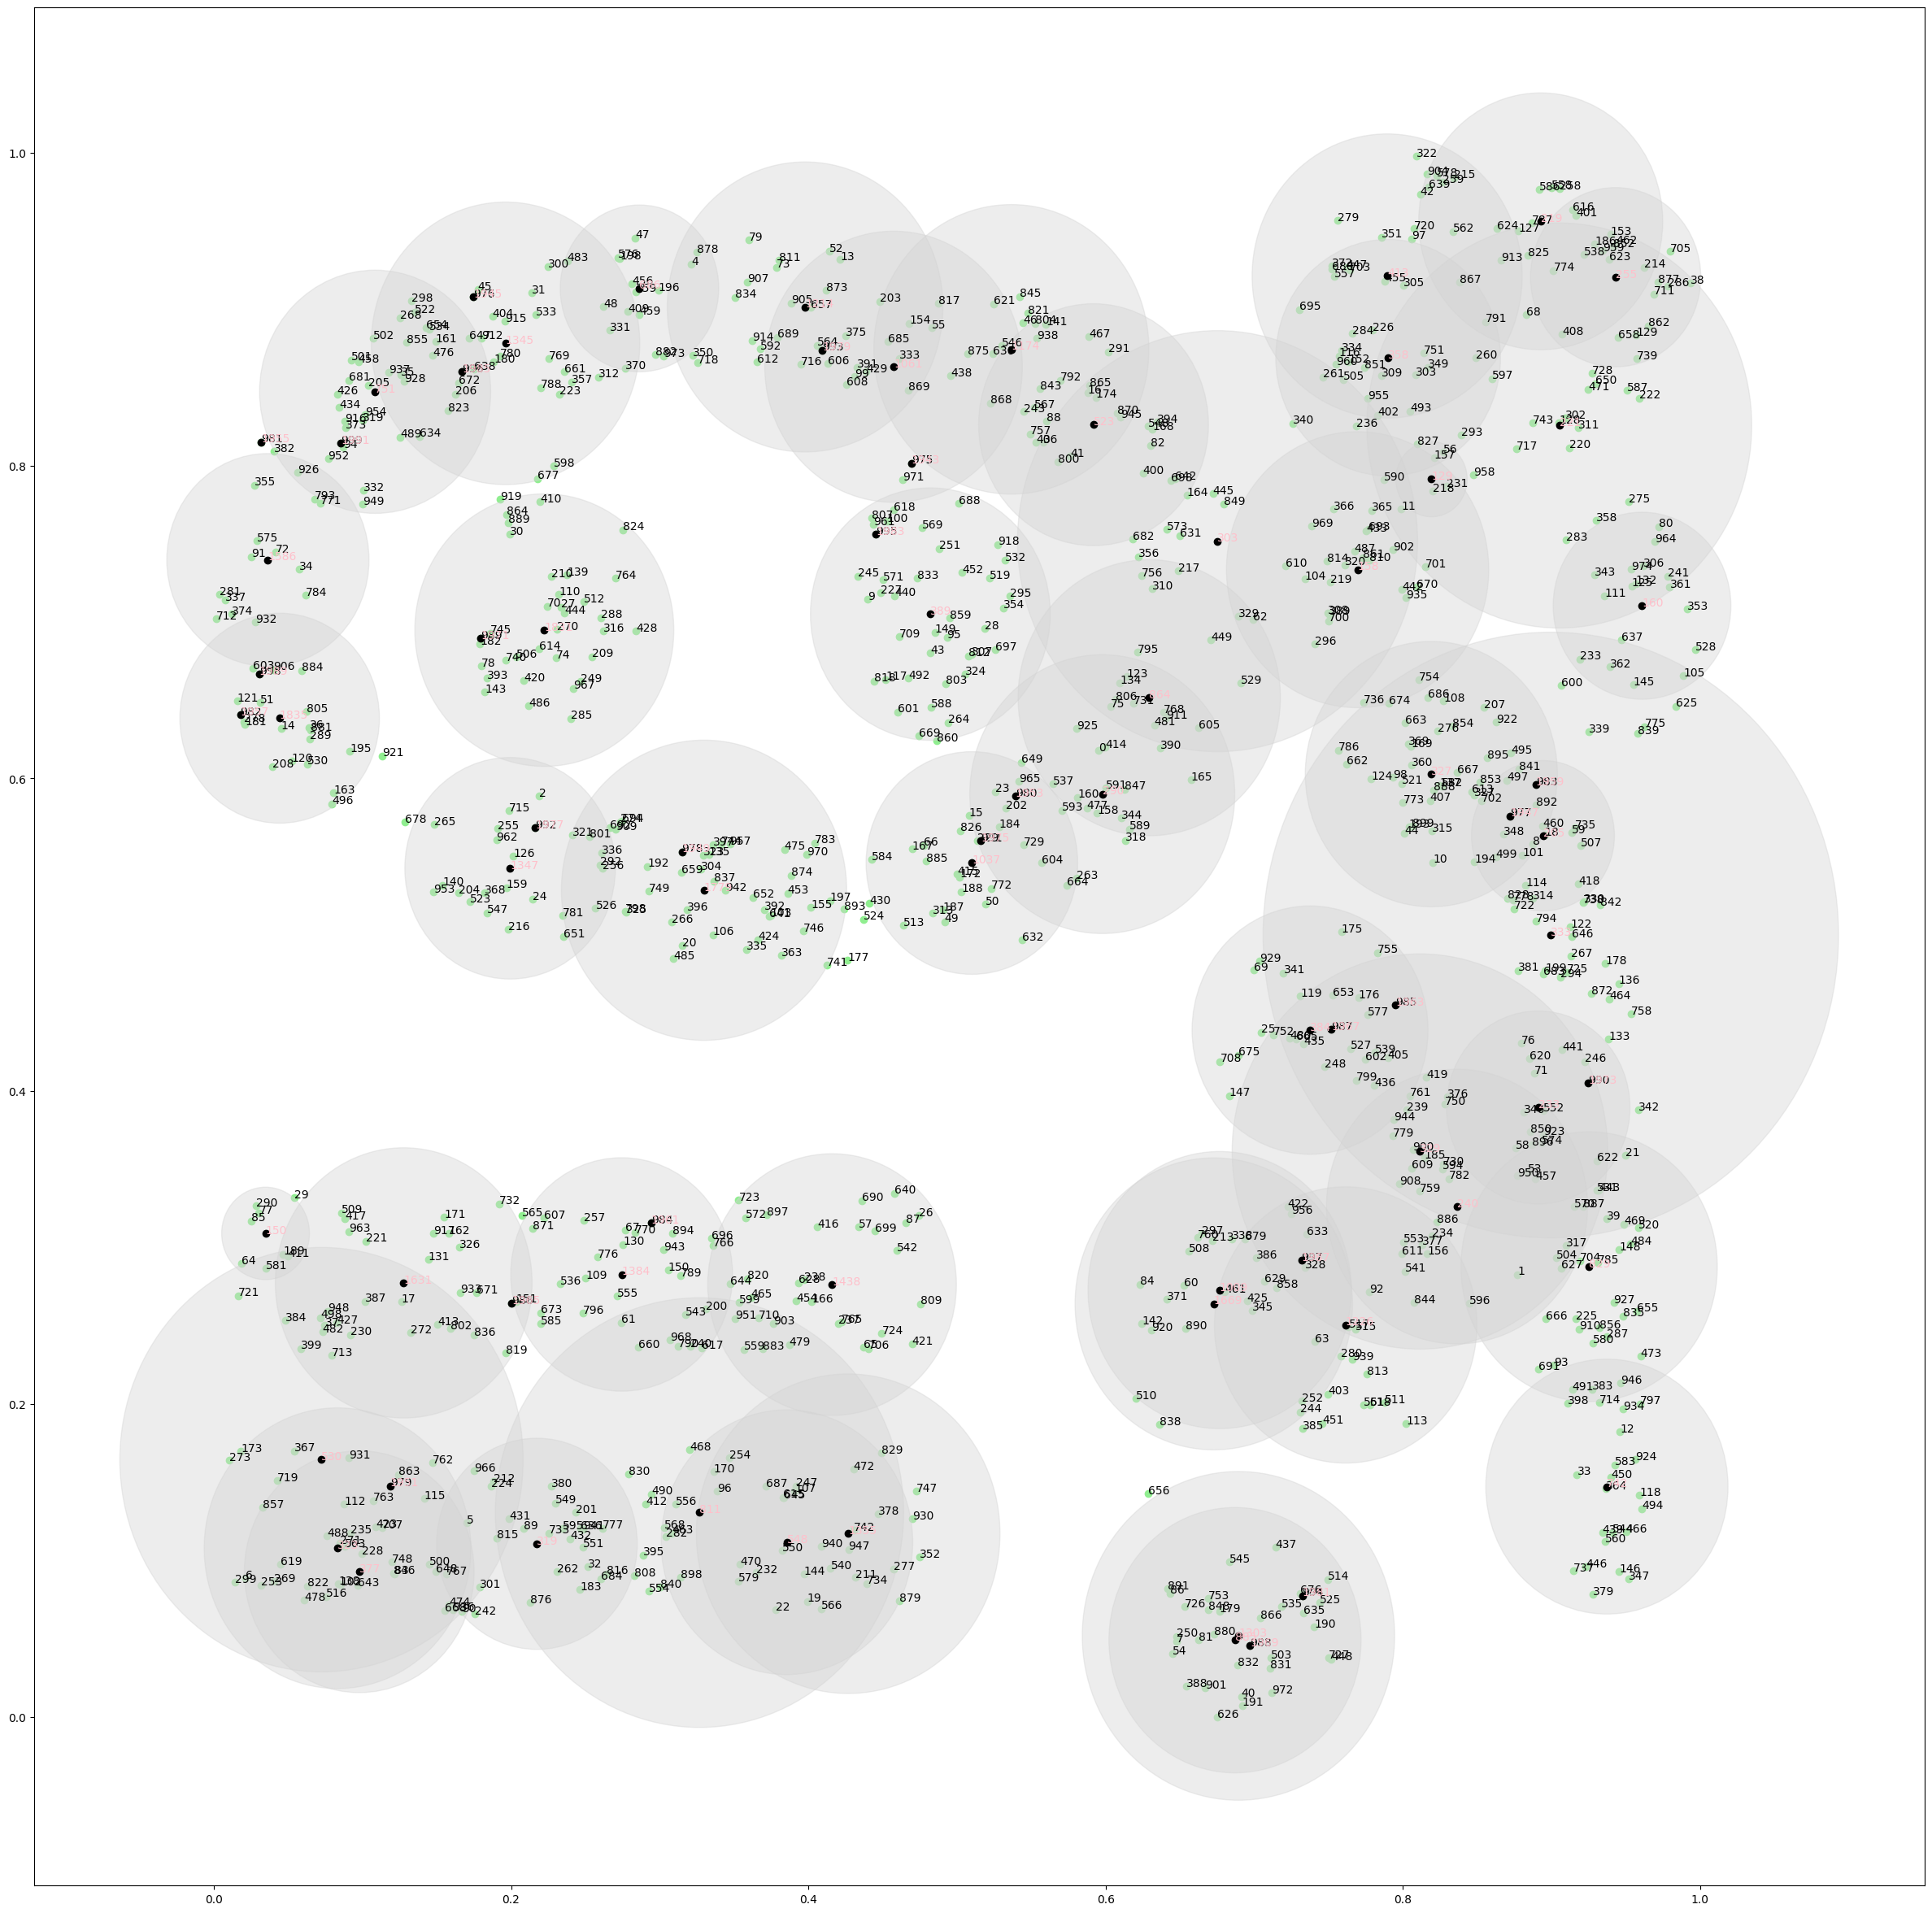

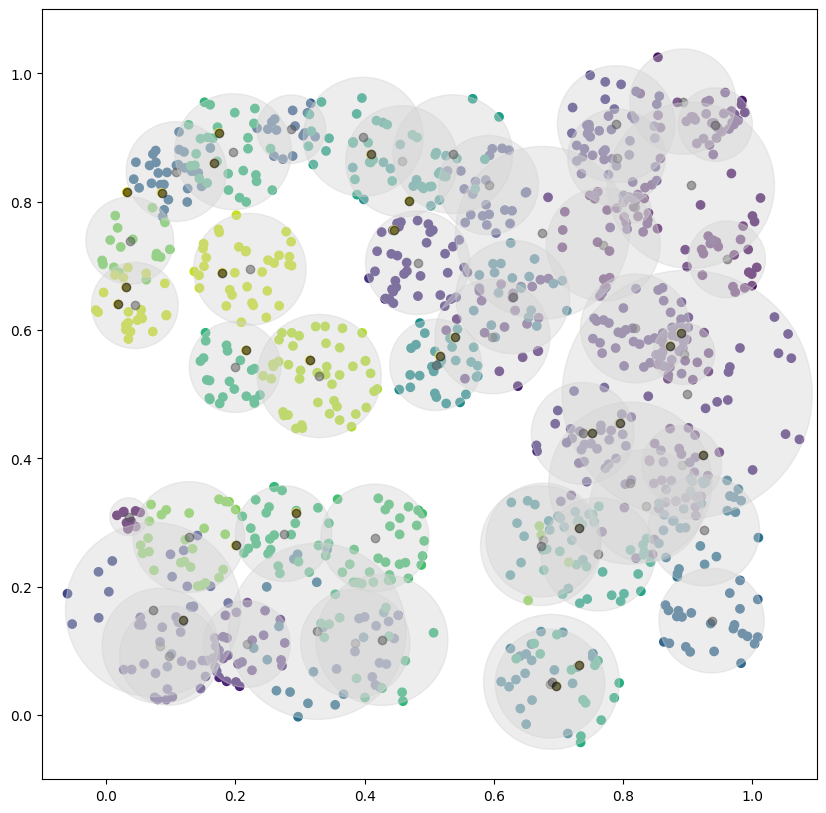

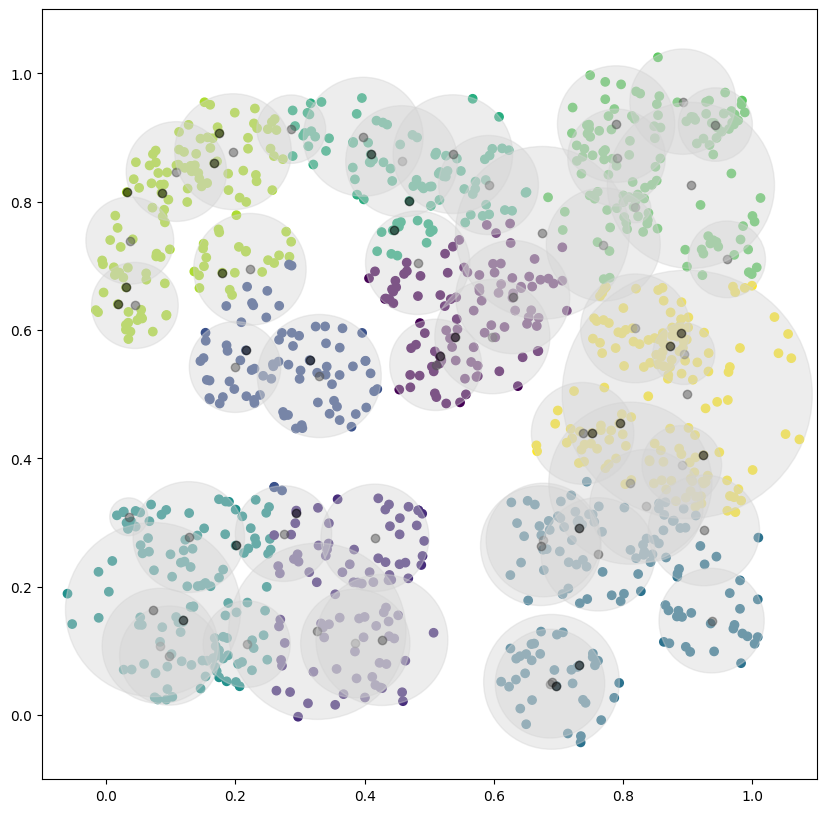

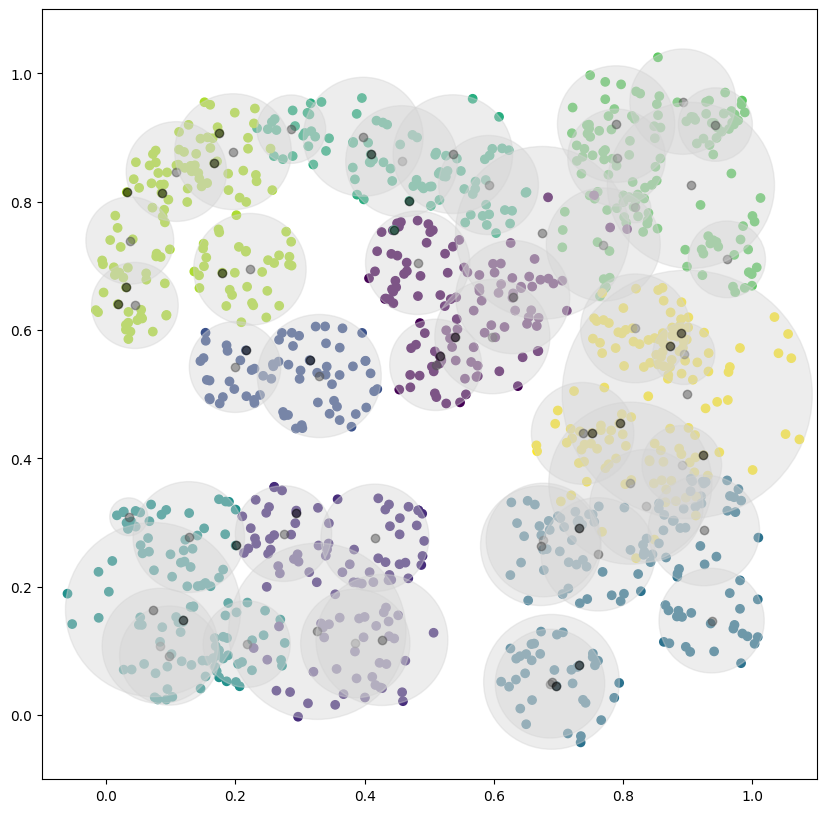

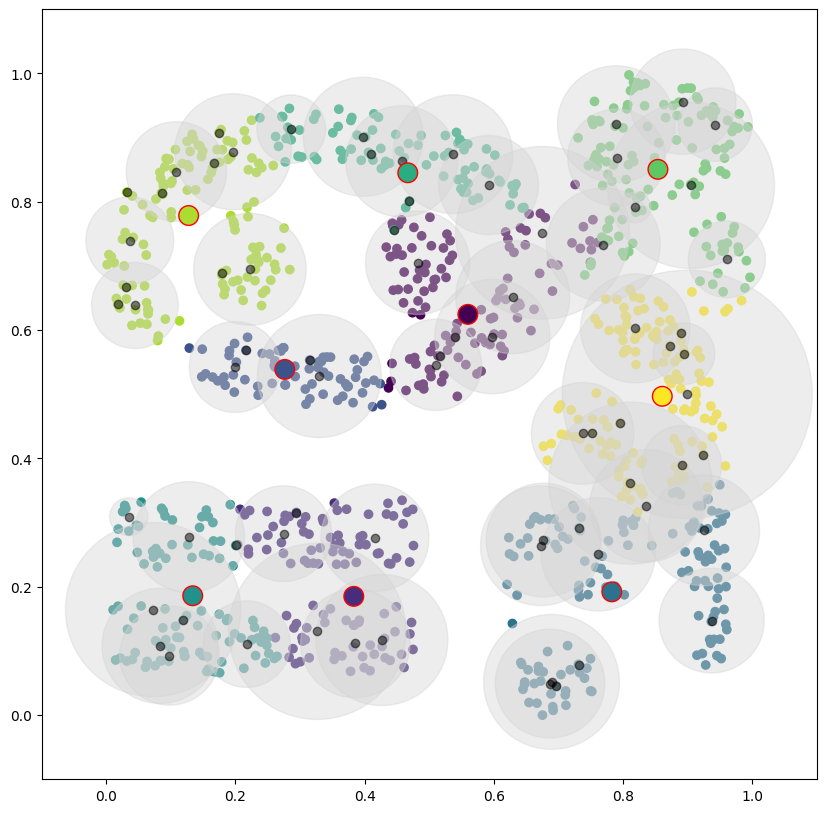

    0    1    2    3    4    5    6     7    8   
0    0    0    0    0    0    0    20    0    5  
1    0    0    0    0    0    0     0   36    0  
2   38    0    0    0    0    3     0    0    0  
3    0    0    0   59    0    0     0    0    0  
4    0    0    0   24    0    0     0    0   42  
5    0   62    0    0   38    0     0    0    0  
6   69    0   66    0    0   84     0   88    0  
7    0   44    0    0   64    0     0    0    0  
8    9    0    0   55    0    0   105    0   89  
Acc: 0.49 NMI: 0.6138440226441729 ARI: 0.3279314294093028 AMI: 0.6073512291693907 Pur.: 0.686 Prec.: 0.569857369808488 Rec.: 0.33840635302411415 F1: 0.4246417629879211 Comp.: 0.5709706940306092 Fowl.: 0.43913933353868945 Homo.: 0.6636786520586035 Clu.Num.: 9 True Clu.Num 9


In [144]:
from method.offlineHandler import SCOPEOffline

scope = SCOPEOffline(n_macro_clusters=9, max_micro_clusters=75, max_singletons=25, sigma=0.5, mu=0.5, seed=0, time_gap=10000, offline_datascale=1000)
for x in X:
	dp = dict(enumerate(x))
	scope.learn_one(dp)
    
    
scope.display_store()

plt.figure(figsize=(30, 30))
plt.scatter(X[:, 0], X[:, 1], c="lightgreen")
for i in range(len(X)):
    plt.text(X[i,0], X[i,1], i)
for id, mc in scope.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
for id, mc in scope.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black", alpha= 1)
    plt.text(float(mccenter[0]), float(mccenter[1]), id, c="pink")

scope_labels_train = []

for x in X:
	dp = dict(enumerate(x))
	pred = scope.predict_one(dp)
	scope_labels_train.append(pred)

scope_centers = scope.centers
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=scope_labels_train)
for id, mc in scope.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
for id, mc in scope.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black", alpha= 0.5)
plt.scatter(scope_centers[:, 0], scope_centers[:,1], c=range(len(scope_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, scope_labels_train))

In [129]:
import copy
from river import utils
from method.SCOPE import SCOPEMicroCluster
def _distance(point_a, point_b):
    return utils.math.minkowski_distance(point_a, point_b, 2)
    
def get_parent(mc_a:SCOPEMicroCluster, mc_b:SCOPEMicroCluster):
    parent = SCOPEMicroCluster(x=mc_a.x, w=mc_a.w, timestamp=mc_a.timestamp, var_time=copy.deepcopy(mc_a.var_time), var_x=copy.deepcopy(mc_a.var_x))
    #parent.add_data(mc_a.weight)
    #print(mc_a, parent)
    parent += mc_b
    radius_a = _distance(mc_a.center, parent.center) + mc_a.radius()
    radius_b = _distance(mc_b.center, parent.center) + mc_b.radius()
    radius = max(radius_a, radius_b)
    parent.r = radius
    return parent

def get_half_parent(mc_a:SCOPEMicroCluster, mc_b:SCOPEMicroCluster): # parent with only weights from mc_a
    actual_parent = get_parent(mc_a, mc_b)
    half_parent = SCOPEMicroCluster(x=actual_parent.center, w=mc_a.weight, timestamp=mc_a.timestamp, var_time=mc_a.var_time, r=actual_parent.r)
    return half_parent

In [131]:
mc_a = SCOPEMicroCluster({0:0, 1:0}, w=1.0, r=0.1, timestamp=1)

mc_b = SCOPEMicroCluster({0:1, 1:0}, w=1.0, r=0.1, timestamp=2)

mc_a.insert({0:0, 1:0.0}, w=1.0, timestamp=4)

#mc_b.insert({0:0.7, 1:1}, w=1.0, timestamp=3)

print(mc_a)
print(mc_b)
mc_parent = get_parent(mc_a, mc_b)
print(mc_parent)

#mc_a.insert({0:0, 1:1}, w=1.0, timestamp=4)

print(mc_a)
print(mc_parent)

mc_half_parent = get_half_parent(mc_a, mc_b)
print(mc_half_parent)

[{0: 0.0, 1: 0.0}, r=0.1, weight=2.0, time=Mean: 2.5]
[{0: 1.0, 1: 0.0}, r=0.1, weight=1.0, time=Mean: 2.]
[{0: 0.3333333333333333, 1: 0.0}, r=0.7666666666666667, weight=3.0, time=Mean: 2.333333]
[{0: 0.0, 1: 0.0}, r=0.1, weight=2.0, time=Mean: 2.5]
[{0: 0.3333333333333333, 1: 0.0}, r=0.7666666666666667, weight=3.0, time=Mean: 2.333333]
[{0: 0.3333333333333333, 1: 0.0}, r=0.7666666666666667, weight=2.0, time=Mean: 2.5]


In [ ]:

from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, sigma=0.5, mu=0.5, seed=0, time_gap=10000, offline_datascale=1000)
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
clustream_centers = genclustream.centers
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

In [ ]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, sigma=0.5, mu=0.5, seed=0, time_gap=10000, offline_datascale=1000, offline_algo="XMeans")
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
clustream_centers = genclustream.centers
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

In [ ]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, seed=0, time_gap=10000, offline_datascale=1000, offline_algo="DBHD", offline_args={"min_cluster_size":50, "rho":1.2, "beta": 0.2})
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
#plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

In [ ]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, seed=0, time_gap=10000, offline_datascale=1000, offline_algo="Spectral")
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
#plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

In [ ]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, seed=0, time_gap=10000, offline_datascale=1000, offline_algo="DBSCAN", offline_args={"eps":0.05, "min_samples":10})
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
#plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

In [ ]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, seed=0, time_gap=10000, offline_datascale=1000, offline_algo="OPTICS", offline_args={"min_samples":10})
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
#plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

In [ ]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, seed=0, time_gap=10000, offline_datascale=1000, offline_algo="MeanShift")
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
#plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

In [ ]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, seed=0, time_gap=10000, offline_datascale=1000, offline_algo="HDBSCAN")
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
clustream_centers = genclustream.centers
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

In [ ]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, seed=0, time_gap=10000, offline_datascale=1000, offline_algo="Agglomerative")
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
#plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))